#### Used the below code with scrapy module to scrape the data from the amazon website and stored the reviews in a csv file.

-----------------

import scrapy

class AmazonReviewsSpider(scrapy.Spider):
    # Spider name
    name = 'amazon_reviews'

    # Domain names to scrape
    allowed_domains = ['amazon.in']

    # Base URL for the MacBook air reviews
    myBaseUrl = "https://www.amazon.in/product-reviews/B07WGD8QQT/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&filterByStar=all_stars&reviewerType=all_reviews&pageNumber="
    start_urls=[]

    # Creating list of urls to be scraped by appending page number a the end of base url
    for i in range(1,121):
        start_urls.append(myBaseUrl+str(i))

    # Defining a Scrapy parser
    def parse(self, response):
            data = response.css('#cm_cr-review_list')

            # Collecting product star ratings
            star_rating = data.css('.review-rating')

            # Collecting user reviews
            comments = data.css('.review-text')
            count = 0

            # Combining the results
            for review in star_rating:
                yield{'stars': ''.join(review.xpath('.//text()').extract()),
                      'comment': ''.join(comments[count].xpath(".//text()").extract())
                     }
                count=count+1

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 

In [2]:
data=pd.read_csv('reviews.csv', encoding='Latin-1')
data

,id,profileName,text,date,title,rating,images,helpful,Colour
0,R1BI9N1D7ECEA3,Dinesh,good,Reviewed in India EEE®EEE³ on 2 June 2023,Good,4,NaN,0,Grey Dazzle
1,RNWWNASZ3F00T,Shailza shukla,If planning to buy a semi automatic washing ma...,Reviewed in India EEE®EEE³ on 19 May 2023,Value for money.,4,NaN,1,Grey Dazzle
2,R2RCRF2G9B3H8H,Mohamed Sulaiman M,It is running Noisy.But washing the clothes li...,Reviewed in India EEE®EEE³ on 7 May 2023,Running Noisy,4,NaN,0,Grey Dazzle
3,R11C371VH0YHYR,Amaan,Ok,Reviewed in India EEE®EEE³ on 8 May 2023,Ok,4,NaN,0,Grey Dazzle
4,R38TKTFSEEWVRQ,Suresh,It is cost effective model so it's body part a...,Reviewed in India EEE®EEE³ on 26 April 2023,Whirlpool washing Machine semi automatic,4,NaN,2,Grey Dazzle
...,...,...,...,...,...,...,...,...,...
1448,R3UH3MB8K0V1JP,Dheeraj jain,Hope this will be less power consumption product,Reviewed in India EEE®EEE³ on 19 Novembe...,Dheeraj,4,NaN,0,Grey Dazzle
1449,R29AL78TFTGJLL,V.Revathi,It's very good,Reviewed in India EEE®EEE³ on 27 Novembe...,EE¤EEEEEEEEEgood,5,NaN,0,Grey Dazzle
1450,R3LSHMKBAUXXSC,Easwaran,Very support whirlpool team very,Reviewed in India EEE®EEE³ on 4 Septembe...,My customer very happy,5,NaN,0,Grey Dazzle
1451,R3H5XNDRYTCPD5,Makarand,Machine is too good and deliveries of awesome ...,Reviewed in India EEE®EEE³ on 12 October...,Very good proudect,4,https://m.media-amazon.com/images/I/710solj17C...,0,Grey Dazzle


In [5]:
reviews = pd.DataFrame(data['text'])
reviews.columns = ['comment']
reviews

,comment
0,good
1,If planning to buy a semi automatic washing ma...
2,It is running Noisy.But washing the clothes li...
3,Ok
4,It is cost effective model so it's body part a...
...,...
1448,Hope this will be less power consumption product
1449,It's very good
1450,Very support whirlpool team very
1451,Machine is too good and deliveries of awesome ...


In [9]:
reviews['comment'] = reviews['comment'].astype(str)

In [6]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harivars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\harivars\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harivars\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\harivars\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [10]:
# clean text data
reviews['comment']= reviews['comment'].apply(lambda x: clean_text(x))

In [11]:
#  add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews["sentiments"] = reviews["comment"].apply(lambda x: sid.polarity_scores(x))
reviews = pd.concat([reviews.drop(['sentiments'], axis=1), reviews['sentiments'].apply(pd.Series)], axis = 1)

reviews

,comment,neg,neu,pos,compound
0,good,0.000,0.000,1.000,0.4404
1,plan buy semi automatic washing machine good p...,0.105,0.623,0.272,0.6486
2,run noisy.but wash clothes like brand washing ...,0.000,0.737,0.263,0.3612
3,ok,0.000,0.000,1.000,0.2960
4,cost effective model body part light,0.000,0.617,0.383,0.4767
...,...,...,...,...,...
1448,hope less power consumption product,0.000,0.580,0.420,0.4404
1449,good,0.000,0.000,1.000,0.4404
1450,support whirlpool team,0.000,0.426,0.574,0.4019
1451,machine good delivery awesome like product rec...,0.000,0.250,0.750,0.9001


In [12]:
# add number of characters column
reviews["nb_chars"] = reviews["comment"].apply(lambda x: len(x))

# add number of words column
reviews["nb_words"] = reviews["comment"].apply(lambda x: len(x.split(" ")))

reviews

,comment,neg,neu,pos,compound,nb_chars,nb_words
0,good,0.000,0.000,1.000,0.4404,4,1
1,plan buy semi automatic washing machine good p...,0.105,0.623,0.272,0.6486,118,19
2,run noisy.but wash clothes like brand washing ...,0.000,0.737,0.263,0.3612,53,8
3,ok,0.000,0.000,1.000,0.2960,2,1
4,cost effective model body part light,0.000,0.617,0.383,0.4767,36,6
...,...,...,...,...,...,...,...
1448,hope less power consumption product,0.000,0.580,0.420,0.4404,35,5
1449,good,0.000,0.000,1.000,0.4404,4,1
1450,support whirlpool team,0.000,0.426,0.574,0.4019,22,3
1451,machine good delivery awesome like product rec...,0.000,0.250,0.750,0.9001,61,8


In [13]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews["comment"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each Comment into a vector data
doc2vec_df = reviews["comment"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews = pd.concat([reviews, doc2vec_df], axis=1)

In [14]:
reviews

,comment,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,good,0.000,0.000,1.000,0.4404,4,1,-0.018278,-0.080465,-0.065627,-0.093252,-0.063828
1,plan buy semi automatic washing machine good p...,0.105,0.623,0.272,0.6486,118,19,0.310174,0.065983,0.183394,-0.277347,0.044182
2,run noisy.but wash clothes like brand washing ...,0.000,0.737,0.263,0.3612,53,8,0.036849,0.021736,0.104316,-0.026614,0.090398
3,ok,0.000,0.000,1.000,0.2960,2,1,0.167286,0.082112,0.040434,-0.141509,0.069830
4,cost effective model body part light,0.000,0.617,0.383,0.4767,36,6,0.048948,0.059763,0.049040,-0.201986,0.005543
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,hope less power consumption product,0.000,0.580,0.420,0.4404,35,5,0.073918,0.113902,0.019071,-0.102810,0.081019
1449,good,0.000,0.000,1.000,0.4404,4,1,-0.019410,-0.081881,-0.065874,-0.090814,-0.065364
1450,support whirlpool team,0.000,0.426,0.574,0.4019,22,3,0.178469,0.065669,0.060187,-0.199207,0.112205
1451,machine good delivery awesome like product rec...,0.000,0.250,0.750,0.9001,61,8,-0.141570,-0.058152,-0.050441,0.056039,-0.043350


In [15]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews["comment"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names_out())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews.index
reviews = pd.concat([reviews, tfidf_df], axis=1)

In [16]:
reviews

,comment,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,...,word_well,word_wheel,word_whirlpool,word_within,word_without,word_work,word_working,word_worth,word_would,word_year
0,good,0.000,0.000,1.000,0.4404,4,1,-0.018278,-0.080465,-0.065627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,plan buy semi automatic washing machine good p...,0.105,0.623,0.272,0.6486,118,19,0.310174,0.065983,0.183394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,run noisy.but wash clothes like brand washing ...,0.000,0.737,0.263,0.3612,53,8,0.036849,0.021736,0.104316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ok,0.000,0.000,1.000,0.2960,2,1,0.167286,0.082112,0.040434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,cost effective model body part light,0.000,0.617,0.383,0.4767,36,6,0.048948,0.059763,0.049040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,hope less power consumption product,0.000,0.580,0.420,0.4404,35,5,0.073918,0.113902,0.019071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1449,good,0.000,0.000,1.000,0.4404,4,1,-0.019410,-0.081881,-0.065874,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1450,support whirlpool team,0.000,0.426,0.574,0.4019,22,3,0.178469,0.065669,0.060187,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1451,machine good delivery awesome like product rec...,0.000,0.250,0.750,0.9001,61,8,-0.141570,-0.058152,-0.050441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


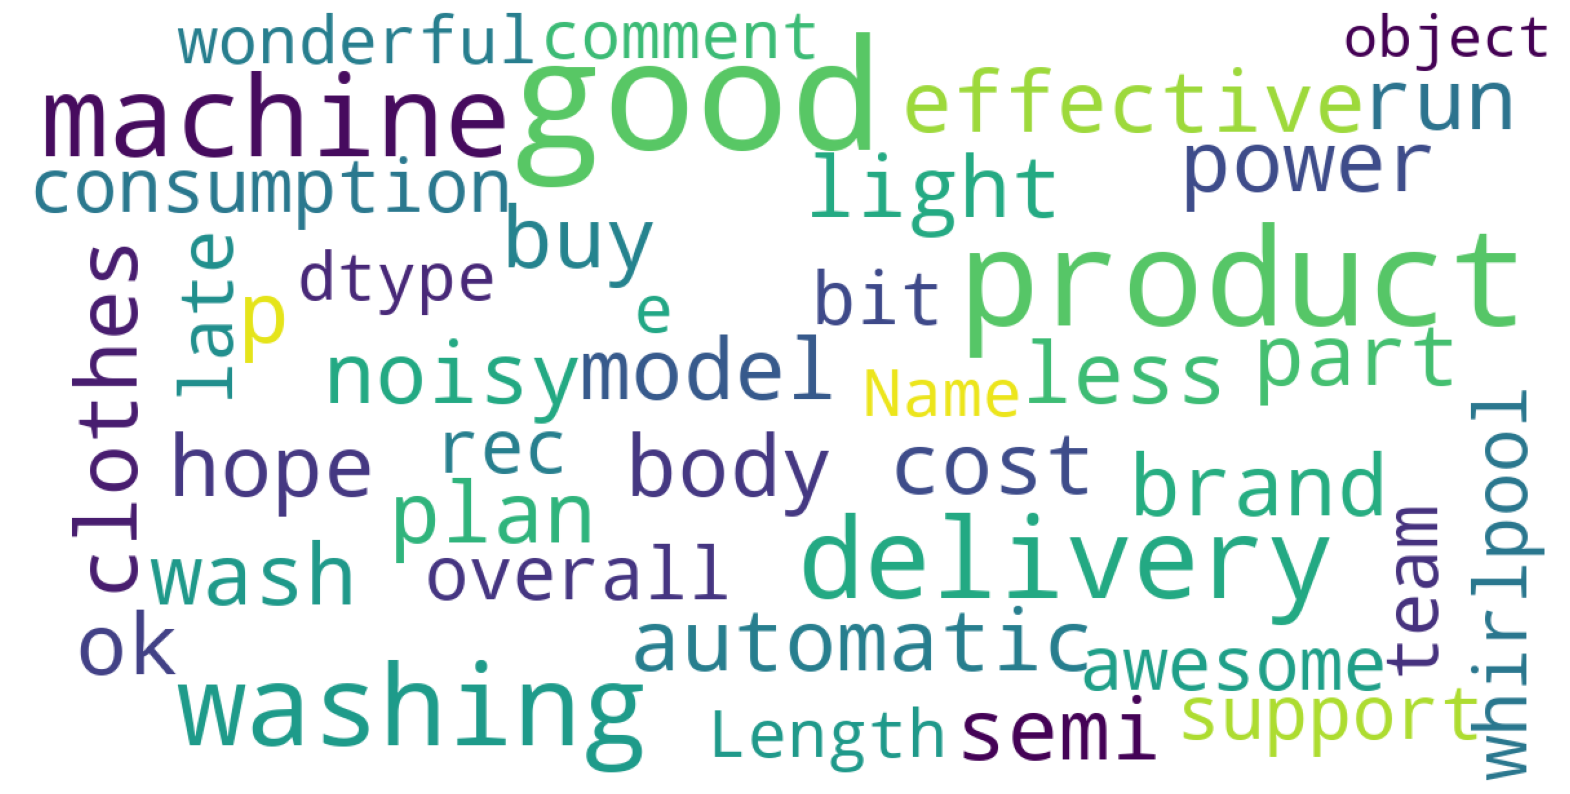

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews["comment"])

In [19]:
# highest positive sentiment reviews (with more than 5 words)
reviews[reviews["nb_words"] >= 5].sort_values("pos", ascending = False)[["comment", "pos"]].head(10)

,comment,pos
147,best product love thank best product,0.883
482,nice classy product comfortable use.everyone like,0.852
1371,nice easy use thanks amazon amazing product li...,0.849
500,good product good price thanks amazon,0.839
767,good product nice work thank amazon,0.832
918,nice product nice colour happy,0.823
1100,awesome product awesome fast delivery thanks a...,0.810
1050,super wash machine thanks amazon,0.810
1110,good machine good price value,0.804
1009,good product quality thanks amazon,0.789


In [20]:
# lowest negative sentiment tweets (with more than 5 words)
reviews[reviews["nb_words"] >= 5].sort_values("neg", ascending = False)[["comment", "neg"]].head(10)

,comment,neg
958,"waste time,waste money waste waste waste waste...",0.918
1401,bad machine dont waste money vã©ry bad whirpho...,0.746
1308,damage product water leak issue,0.651
631,damage product receive damage near wheel,0.615
1098,poor quality poor finishingwire length small,0.608
1324,bad quality...because aluminum wind motor comp...,0.533
1216,product dirty amazon deny replace product,0.530
169,pathetic service give amazon whirlpool fraud r...,0.528
1280,bad product receive screws fix damage assembly...,0.522
459,regulate switch low quality poor engineer service,0.510


-----------------

#### Final Observations
So, the reviews have been sorted as positive and negative reviews based on the positive and negative scores given by the sentiment analyzer for each reviews.